In [1]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

# BUMP

In [10]:
file_name_bump= "bump1.json"
dataBump = pd.read_json(file_name_bump)
dataBump.head(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time
0,-1.110223e-17,-0.421379,9.854396,10.228029,0.073315,-1.762132,0,data_item,0,d9326939-d68b-45e9-b3d7-aee75434a19f,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281311
1,-4.440892e-17,-0.536301,9.820303,10.093954,0.008965,-1.197101,0,data_item,0,4acacb8d-300e-4873-915c-6fb9ed7fddba,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281438
2,1.665335e-17,-0.373495,9.837924,10.333375,0.103526,-0.938527,0,data_item,0,ceeff057-bd74-4203-992b-9277d07ded01,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281502
3,3.885781e-17,0.660800,9.690441,9.672575,-0.043706,-1.053449,0,data_item,0,2c488a80-f052-4819-8e57-1da34133de1c,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281609
4,0.000000e+00,0.344765,9.784677,10.189722,0.044520,-1.015141,0,data_item,0,dd5d3147-3294-4dd5-9687-8872c0dca674,359988060800748,3.599881e+27,5.957424,80.544351,0,0,1529838281702


In [9]:
dataBump.shape

(319, 17)

Text(0.5,1,'Reoriented ay for bump')

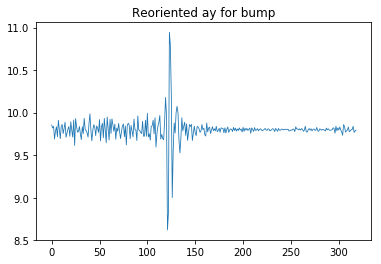

In [12]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay for bump')

Text(0.5,1,'Reoriented ax for bump')

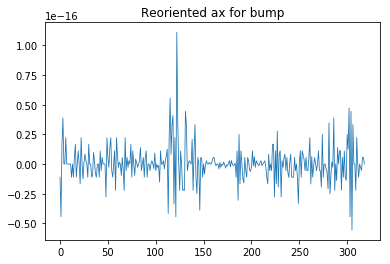

In [15]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax for bump')

Text(0.5,1,'Raw ay for bump')

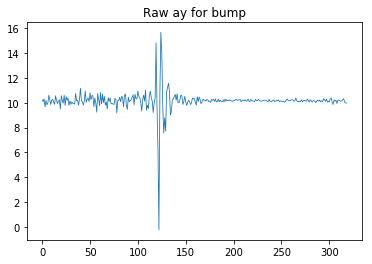

In [14]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay for bump')

Text(0.5,1,'Raw ax for bump')

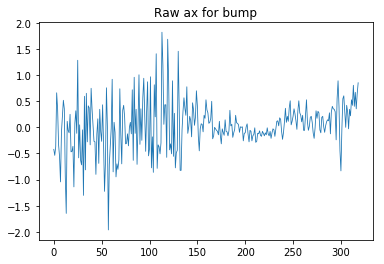

In [16]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax for bump')

In [17]:
bumpFeatures = ['acceY', 'acceY_raw','acceX','acceX_raw',]
dataBump = dataBump[bumpFeatures]
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,9.854396,10.228029,-1.110223e-17,-0.421379
1,9.820303,10.093954,-4.440892e-17,-0.536301
2,9.837924,10.333375,1.665335e-17,-0.373495
3,9.690441,9.672575,3.885781e-17,0.660800
4,9.784677,10.189722,0.000000e+00,0.344765


In [18]:
dataBump = dataBump.diff()
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,NaN,NaN,NaN,NaN
1,-0.034093,-0.134075,-3.330669e-17,-0.114922
2,0.017621,0.239421,6.106227e-17,0.162806
3,-0.147483,-0.660800,2.220446e-17,1.034295
4,0.094236,0.517147,-3.885781e-17,-0.316035


Text(0.5,1,'Reoriented ay first derivative for bump')

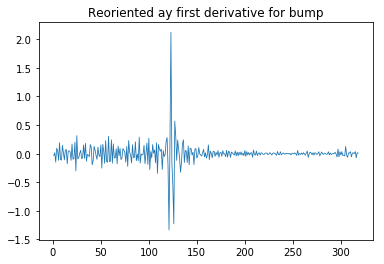

In [19]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay first derivative for bump')

Text(0.5,1,'Reoriented ax first derivative for bump')

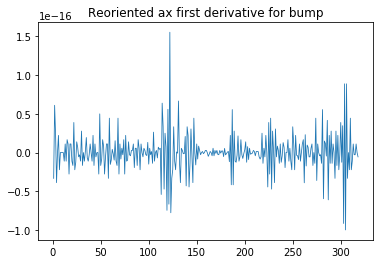

In [20]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax first derivative for bump')

Text(0.5,1,'Raw ay first derivative for bump')

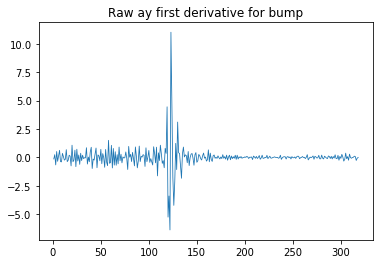

In [21]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay first derivative for bump')

Text(0.5,1,'Raw ax first derivative for bump')

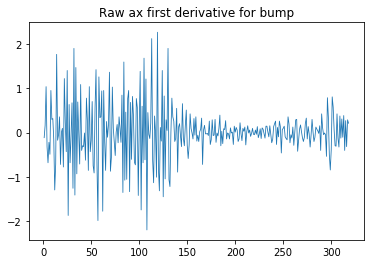

In [22]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax first derivative for bump')

In [23]:
dataBump = dataBump.diff()
dataBump.head()

,acceY,acceY_raw,acceX,acceX_raw
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0.051715,0.373496,9.436896e-17,0.277727
3,-0.165104,-0.900221,-3.885781e-17,0.871489
4,0.241719,1.177947,-6.106227e-17,-1.350330


Text(0.5,1,'Reoriented ay second derivative for bump')

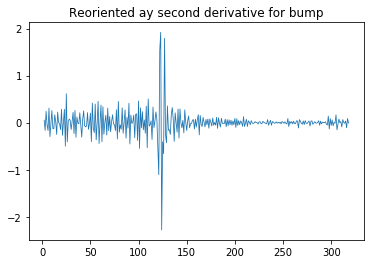

In [24]:
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay second derivative for bump')

Text(0.5,1,'Reoriented ax second derivative for bump')

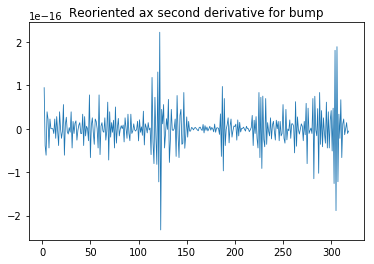

In [25]:
(dataBump.acceX.plot.line(lw=0.8))
plt.title('Reoriented ax second derivative for bump')

Text(0.5,1,'Raw ay second derivative for bump')

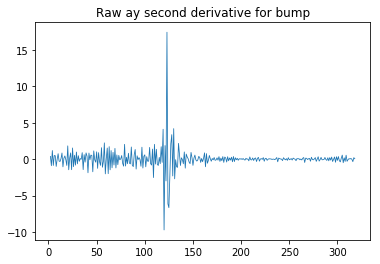

In [26]:
(dataBump.acceY_raw.plot.line(lw=0.8))
plt.title('Raw ay second derivative for bump')

Text(0.5,1,'Raw ax second derivative for bump')

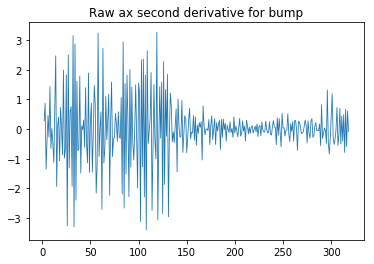

In [27]:
(dataBump.acceX_raw.plot.line(lw=0.8))
plt.title('Raw ax second derivative for bump')